In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:

# importing required libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import gc

from sklearn.linear_model import Perceptron
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.linear_model import LogisticRegression  

from sklearn.ensemble import RandomForestClassifier
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

# importing required libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import gc

from sklearn.linear_model import Perceptron
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.linear_model import LogisticRegression  

from sklearn.ensemble import RandomForestClassifier
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.naive_bayes import GaussianNB

from sklearn.neighbors import KNeighborsClassifier 
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [3]:


def classify(path):

  #Importing dataset
  #dataset= pd.read_csv(path, header=None)
  #dataset= dataset.fillna(0)
  #print("Original Dataset")
  #print(dataset.head())


  dataset =[]
  dataset = pd.DataFrame(dataset)

  

  chunksize = 10
  tfr = pd.read_csv(path, chunksize=chunksize, iterator=True,header= None)

  i=1
  with tfr as reader:
      for chunk in reader:
          print("index_value")
          print(i)
          dataset = pd.concat([dataset,chunk], axis=0, ignore_index=True)
          i=i+1



  #Output feature as Y
  Y = dataset.iloc[:, 0]
  #Features as X
  X = dataset.iloc[:,1:]

  #Cross validation to split into training and testing
  from distutils.version import LooseVersion as Version
  from sklearn import __version__ as sklearn_version
  if Version(sklearn_version) < '0.18':
    from sklearn.cross_validation import train_test_split
  else:
    from sklearn.model_selection import train_test_split
  print(Version(sklearn_version))   
  X_train, X_test, y_train, y_test = train_test_split(
      X, Y.values.ravel(), test_size=0.3, random_state=0
  ) 

  import os
  print("\nAccuracies of the given dataset: "+ os.path.basename(path))
  
  '''
  del X
  gc.collect()
  del Y
  gc.collect()
  '''
  
  
  #1) Perceptron model

  
  ppn = Perceptron(eta0=0.01, random_state=0)
  ppn.fit(X_train, y_train)
  y_pred = ppn.predict(X_test)
  print('Perceptron Model: %.2f' % accuracy_score(y_test, y_pred))

  # roc curve for models
  from sklearn.calibration import CalibratedClassifierCV
  clf_isotonic = CalibratedClassifierCV(ppn, cv=10, method='isotonic')
  clf_isotonic.fit(X_train, y_train)

  pred_prob1 = clf_isotonic.predict_proba(X_test)
  #pred_prob1 = ppn.predict_proba(X_test)
  fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1) 

  auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])
 



  #2) Logistic Regression
 
  classifier = LogisticRegression(random_state = 0)
  classifier.fit(X_train, y_train)
  # Predicting the test set result using 
  # predict function under LogisticRegression 
  y_pred = classifier.predict(X_test)
  print('Logistic Regression: %.2f' % accuracy_score(y_test, y_pred))

  pred_prob2 = classifier.predict_proba(X_test)
  fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2[:,1], pos_label=1) 
  auc_score2 = roc_auc_score(y_test, pred_prob2[:,1])

  




  #3) Support Vector Machines
  
  svclassifier = SVC(kernel='linear', probability=True)
  svclassifier.fit(X_train, y_train)
  y_pred = svclassifier.predict(X_test)
  print('Support Vector Machine: %.2f' % accuracy_score(y_test, y_pred))
   
  pred_prob3 = svclassifier.predict_proba(X_test)
  fpr3, tpr3, thresh3 = roc_curve(y_test, pred_prob3[:,1], pos_label=1) 
  auc_score3 = roc_auc_score(y_test, pred_prob3[:,1])

  

  
  
  #4) Naive Bayes Classifier
  
  #Build a Gaussian Classifier
  model = GaussianNB()
  #Model training
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  print('Naive Bayes: %.2f' % accuracy_score(y_test, y_pred))

  pred_prob4 = model.predict_proba(X_test)
  fpr4, tpr4, thresh4 = roc_curve(y_test, pred_prob4[:,1], pos_label=1) 
  auc_score4 = roc_auc_score(y_test, pred_prob4[:,1])


  #5) Decesion Tree Classifier
  #Load libraries

  #Create Decision Tree classifer object
  clf = DecisionTreeClassifier()
  #Train Decision Tree Classifer
  clf = clf.fit(X_train,y_train)
  #Predict the response for test dataset
  y_pred = clf.predict(X_test)
  print('Decision Tree : %.2f' % accuracy_score(y_test, y_pred))

  pred_prob5 = clf.predict_proba(X_test)
  fpr5, tpr5, thresh5 = roc_curve(y_test, pred_prob5[:,1], pos_label=1) 
  auc_score5 = roc_auc_score(y_test, pred_prob5[:,1])

  #6)Random Forest Classifier
  #importing random forest classifier from assemble module

  # creating a RF classifier
  clf = RandomForestClassifier(n_estimators = 100)  
  # Training the model on the training dataset
  # fit function is used to train the model using the training sets as parameters
  clf.fit(X_train, y_train)
  # performing predictions on the test dataset
  y_pred = clf.predict(X_test)
  print('Random Forest: %.2f' % accuracy_score(y_test, y_pred))

  pred_prob6 = clf.predict_proba(X_test)
  fpr6, tpr6, thresh6 = roc_curve(y_test, pred_prob6[:,1], pos_label=1) 
  auc_score6 = roc_auc_score(y_test, pred_prob6[:,1])



  #7) KNN Classifier

  knn = KNeighborsClassifier(n_neighbors = 15) #Total samples 2958*0.7. square root of 2958*0.7 is 38.0712
  knn.fit(X_train, y_train)
  y_pred = knn.predict(X_test)
  #performing predictions on the test dataset
  print('KNN Classifier: %.2f' % accuracy_score(y_test, y_pred))

  pred_prob7 = knn.predict_proba(X_test)
  fpr7, tpr7, thresh7 = roc_curve(y_test, pred_prob7[:,1], pos_label=1) 
  auc_score7 = roc_auc_score(y_test, pred_prob7[:,1])

  # roc curve for tpr = fpr 
  random_probs = [0 for i in range(len(y_test))]
  p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)
  # auc scores
   # matplotlib
  import matplotlib.pyplot as plt
  plt.style.use('seaborn')
# plot roc curves
  plt.plot(fpr1, tpr1, linestyle='--',color='red', label='Perceptron Model')
  plt.plot(fpr7, tpr7, linestyle='--',color='cyan', label='KNN Classifier')
  plt.plot(fpr3, tpr3, linestyle='--',color='blue', label='Support Vector Machine')
  plt.plot(fpr4, tpr4, linestyle='--',color='green', label='Naive Bayes')
  plt.plot(fpr5, tpr5, linestyle='--',color='yellow', label='Decision Tree ')
  plt.plot(fpr6, tpr6, linestyle='--',color='indigo', label='Random Forest')
  plt.plot(fpr2, tpr2, linestyle='--',color='orange', label='Logistic Regression')

  plt.plot(p_fpr, p_tpr, linestyle='--', color='black')
   # title
  plt.title('ROC curve')
  #   x label
  plt.xlabel('False Positive Rate')
   # y label
  plt.ylabel('True Positive rate')

  plt.legend(loc='best')
  plt.savefig('ROC',dpi=300)
  plt.show();


  print("AUC Scores for: " + os.path.basename(path))
  print('Peceptron AUC Score : %.2f' % auc_score1)
  print('Logistic Regression AUC Score : %.2f' % auc_score2)
  print('SVM AUC Score : %.2f' % auc_score3)
  print('Naive Bayes AUC Score : %.2f' % auc_score4)
  print('Decision Tree AUC Score : %.2f' % auc_score5)  
  print('Random Forest AUC Score : %.2f' % auc_score6)
  print('KNN AUC Score : %.2f' % auc_score7)  

  

# 1 Dataset1

index_value
1
index_value
2
index_value
3
index_value
4
index_value
5
index_value
6
index_value
7
index_value
8
index_value
9
index_value
10
index_value
11
index_value
12
index_value
13
index_value
14
index_value
15
index_value
16
index_value
17
index_value
18
index_value
19
index_value
20
index_value
21
index_value
22
index_value
23
index_value
24
index_value
25
index_value
26
index_value
27
index_value
28
index_value
29
index_value
30
index_value
31
index_value
32
index_value
33
index_value
34
index_value
35
index_value
36
index_value
37
index_value
38
index_value
39
index_value
40
index_value
41
index_value
42
index_value
43
index_value
44
index_value
45
index_value
46
index_value
47
index_value
48
index_value
49
index_value
50
index_value
51
index_value
52
index_value
53
index_value
54
index_value
55
index_value
56
index_value
57
index_value
58
index_value
59
index_value
60
index_value
61
index_value
62
index_value
63
index_value
64
index_value
65
index_value
66
index_value
67
inde

<ipython-input-6-8d9bb05dca82>:50: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if Version(sklearn_version) < '0.18':
<ipython-input-6-8d9bb05dca82>:54: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  print(Version(sklearn_version))


Perceptron Model: 1.00
Logistic Regression: 1.00
Support Vector Machine: 1.00
Naive Bayes: 1.00
Decision Tree : 1.00
Random Forest: 1.00
KNN Classifier: 1.00


<ipython-input-6-8d9bb05dca82>:189: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


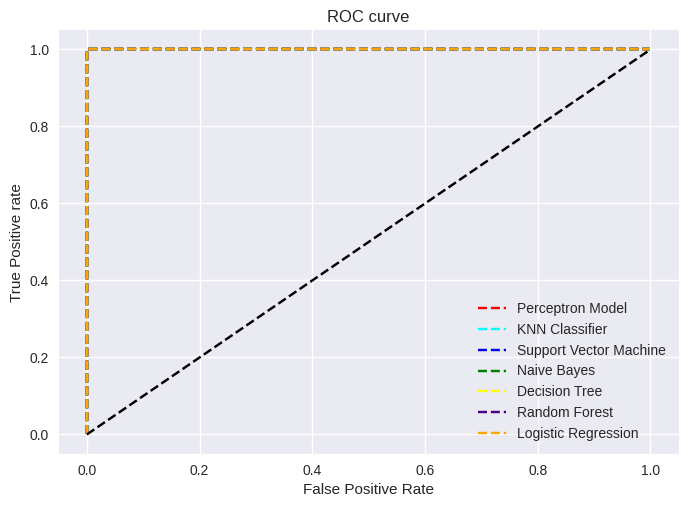

AUC Scores: Sudeb 160
Peceptron AUC Score : 1.00
Logistic Regression AUC Score : 1.00
SVM AUC Score : 1.00
Naive Bayes AUC Score : 1.00
Decision Tree AUC Score : 1.00
Random Forest AUC Score : 1.00
KNN AUC Score : 1.00


In [ ]:
# importing or loading the  origa_gray_vgg16 dataset
path= '/content/drive/MyDrive/Early-stage-Glaucoma-Eye-Disease-Detection/Pca_Features/ORIGA_Gray_VGG16_PCA.csv'


classify(path)

# 2 Dataset2



index_value
1
index_value
2
index_value
3
index_value
4
index_value
5
index_value
6
index_value
7
index_value
8
index_value
9
index_value
10
index_value
11
index_value
12
index_value
13
index_value
14
index_value
15
index_value
16
index_value
17
index_value
18
index_value
19
index_value
20
index_value
21
index_value
22
index_value
23
index_value
24
index_value
25
index_value
26
index_value
27
index_value
28
index_value
29
index_value
30
index_value
31
index_value
32
index_value
33
index_value
34
index_value
35
index_value
36
index_value
37
index_value
38
index_value
39
index_value
40
index_value
41
index_value
42
index_value
43
index_value
44
index_value
45
index_value
46
index_value
47
index_value
48
index_value
49
index_value
50
index_value
51
index_value
52
index_value
53
index_value
54
index_value
55
index_value
56
index_value
57
index_value
58
index_value
59
index_value
60
index_value
61
index_value
62
index_value
63
index_value
64
index_value
65
index_value
66
index_value
67
inde

<ipython-input-3-a2452e73ee45>:36: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if Version(sklearn_version) < '0.18':
<ipython-input-3-a2452e73ee45>:40: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  print(Version(sklearn_version))


Logistic Regression: 0.99
Support Vector Machine: 0.99
Naive Bayes: 0.64
Decision Tree : 0.70
Random Forest: 0.86
KNN Classifier: 0.85


<ipython-input-3-a2452e73ee45>:176: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


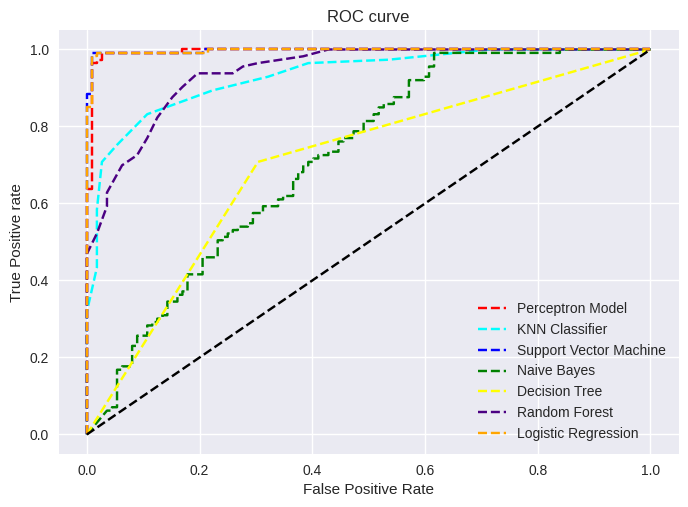

AUC Scores for: pcaresult.csv
Peceptron AUC Score : 0.99
Logistic Regression AUC Score : 1.00
SVM AUC Score : 1.00
Naive Bayes AUC Score : 0.72
Decision Tree AUC Score : 0.70
Random Forest AUC Score : 0.94
KNN AUC Score : 0.93


In [4]:
# importing or loading the  ORIGA_GRAY_XCEPTION dataset
path= '/content/drive/MyDrive/pcaresult.csv'

classify(path)